# Predictive Analytics for Sales Forecasting

## Introduction

The retail sales dataset contains historical sales data over a period. This analysis aims to build a model to forecast future sales. The goal is to develop and evaluate predictive models and visualize the forecasts to provide actionable insights for business decisions.

## Objectives

- Perform time series analysis
- Build and evaluate predictive models (ARIMA, LSTM)
- Visualize forecasts


# Item 1: Data Preparation

In [1]:
import pandas as pd

# Load the dataset without special parameters
data_path = '../data/retail_sales_data.csv'
sales_df = pd.read_csv(data_path)

# Display the first few rows and the column names
print("First few rows of the dataset:")
print(sales_df.head())
print("\nColumn names:")
print(sales_df.columns)


First few rows of the dataset:
     DATE   RSXFS  CPIAUCSL       Actual  Days  Sales per Day
0  1/1/92  146925     138.3  320630.0824    31    10342.90588
1  2/1/92  147223     138.6  320584.9869    29    11054.65472
2  3/1/92  146805     139.1  318525.6897    31    10275.02225
3  4/1/92  148032     139.4  320496.7135    30    10683.22378
4  5/1/92  149010     139.7  321921.3320    31    10384.55910

Column names:
Index(['DATE', 'RSXFS', 'CPIAUCSL', 'Actual', 'Days', 'Sales per Day'], dtype='object')


In [2]:
import pandas as pd

# Load the dataset
data_path = '../data/retail_sales_data.csv'
sales_df = pd.read_csv(data_path, parse_dates=['DATE'], index_col='DATE')

# Display the first few rows of the dataset
sales_df.head()

C:\Users\Ede\AppData\Local\Temp\ipykernel_20436\2419460234.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  sales_df = pd.read_csv(data_path, parse_dates=['DATE'], index_col='DATE')


,RSXFS,CPIAUCSL,Actual,Days,Sales per Day
DATE,,,,,
1992-01-01,146925,138.3,320630.0824,31,10342.90588
1992-02-01,147223,138.6,320584.9869,29,11054.65472
1992-03-01,146805,139.1,318525.6897,31,10275.02225
1992-04-01,148032,139.4,320496.7135,30,10683.22378
1992-05-01,149010,139.7,321921.3320,31,10384.55910


In [3]:
# Display the last few rows of the dataset
sales_df.tail()

,RSXFS,CPIAUCSL,Actual,Days,Sales per Day
DATE,,,,,
2022-11-01,593090,298.598,599465.8595,31,19337.60837
2022-12-01,588540,298.990,594087.0274,31,19164.09766
2023-01-01,603211,300.536,605764.0532,31,19540.77591
2023-02-01,600159,301.648,600477.3361,29,20706.11504
2023-03-01,595414,301.808,595414.0000,31,19206.90323


### Dataset Overview

The retail sales dataset is made up of 6 features and 376 records (or observations) contains historical data on retail sales over a period ranging from January 1992 to March 2023. The data is recorded on a monthly basis and includes several key attributes that can be used for time series analysis and forecasting.

#### Attributes:

- **RSXFS**: Retail Sales excluding Food Services. This column represents the monthly retail sales value in millions of dollars.
- **CPIAUCSL**: Consumer Price Index for All Urban Consumers. This index is used to measure the average change over time in the prices paid by urban consumers for a market basket of consumer goods and services.
- **Actual**: The actual sales value recorded for the month.
- **Days**: The number of days in the respective month.
- **Sales per Day**: The average sales per day for the month, calculated as `Actual / Days`.

#### Sample Data Points:

1. **January 1992**:
   - **RSXFS**: 146,925
   - **CPIAUCSL**: 138.3
   - **Actual**: 320,630.0824
   - **Days**: 31
   - **Sales per Day**: 10,342.90588

2. **February 1992**:
   - **RSXFS**: 147,223
   - **CPIAUCSL**: 138.6
   - **Actual**: 320,584.9869
   - **Days**: 29
   - **Sales per Day**: 11,054.65472

3. **March 1992**:
   - **RSXFS**: 146,805
   - **CPIAUCSL**: 139.1
   - **Actual**: 318,525.6897
   - **Days**: 31
   - **Sales per Day**: 10,275.02225

4. **April 1992**:
   - **RSXFS**: 148,032
   - **CPIAUCSL**: 139.4
   - **Actual**: 320,496.7135
   - **Days**: 30
   - **Sales per Day**: 10,683.22378

5. **May 1992**:
   - **RSXFS**: 149,010
   - **CPIAUCSL**: 139.7
   - **Actual**: 321,921.3320
   - **Days**: 31
   - **Sales per Day**: 10,384.55910

---

1. **November 2022**:
   - **RSXFS**: 593,090
   - **CPIAUCSL**: 298.598
   - **Actual**: 599,465.8595
   - **Days**: 31
   - **Sales per Day**: 19,337.60837

2. **December 2022**:
   - **RSXFS**: 588,540
   - **CPIAUCSL**: 298.990
   - **Actual**: 594,087.0274
   - **Days**: 31
   - **Sales per Day**: 19,164.09766

3. **January 2023**:
   - **RSXFS**: 603,211
   - **CPIAUCSL**: 300.536
   - **Actual**: 605,764.0532
   - **Days**: 31
   - **Sales per Day**: 19,540.77591

4. **February 2023**:
   - **RSXFS**: 600,159
   - **CPIAUCSL**: 301.648
   - **Actual**: 600,477.3361
   - **Days**: 29
   - **Sales per Day**: 20,706.11504

5. **March 2023**:
   - **RSXFS**: 595,414
   - **CPIAUCSL**: 301.808
   - **Actual**: 595,414.0000
   - **Days**: 31
   - **Sales per Day**: 19,206.90323

This dataset provides a comprehensive view of the retail sales over an extended period, capturing trends and fluctuations in the retail market. The attributes included allow for detailed analysis and modeling to forecast future sales.


# Item 2: Time Series Analysis

In [4]:
# Check the Python version
import sys
print("Python version")
print(sys.version)
print("Version info.")
print(sys.version_info)


Python version
3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]
Version info.
sys.version_info(major=3, minor=11, micro=7, releaselevel='final', serial=0)


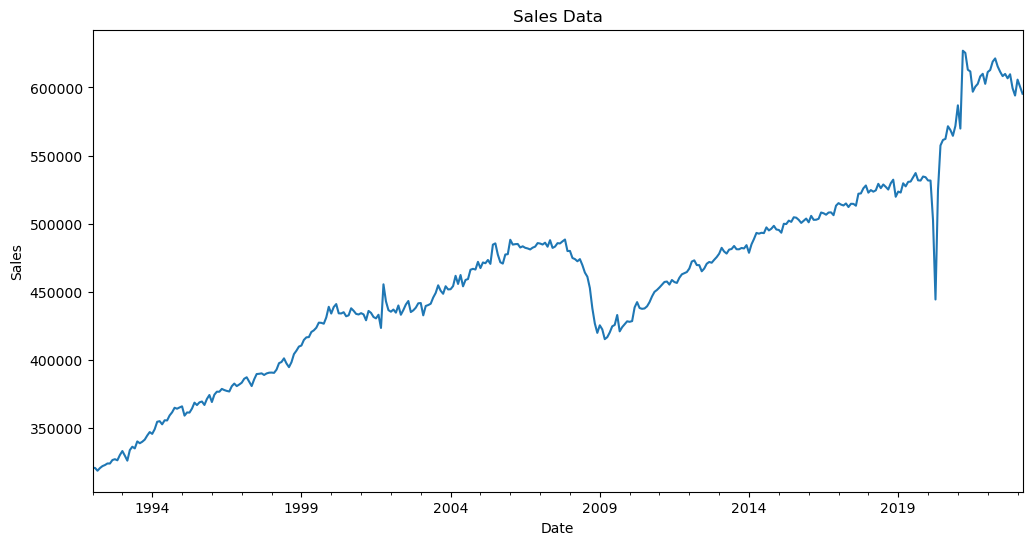

Summary Statistics for Sales Data:
count       375.000000
mean     458859.812637
std       69599.891204
min      318525.689700
25%      421259.796250
50%      460236.655200
75%      500209.465200
max      626994.915300
Name: Actual, dtype: float64


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler


# Plot the sales data
plt.figure(figsize=(12, 6))
sales_df['Actual'].plot()
plt.title('Sales Data')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

# Display summary statistics
sales_summary = sales_df['Actual'].describe()
print("Summary Statistics for Sales Data:")
print(sales_summary)

# Item 3: Building Predictive Model "ARIMA Model"

C:\Users\Ede\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ede\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ede\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


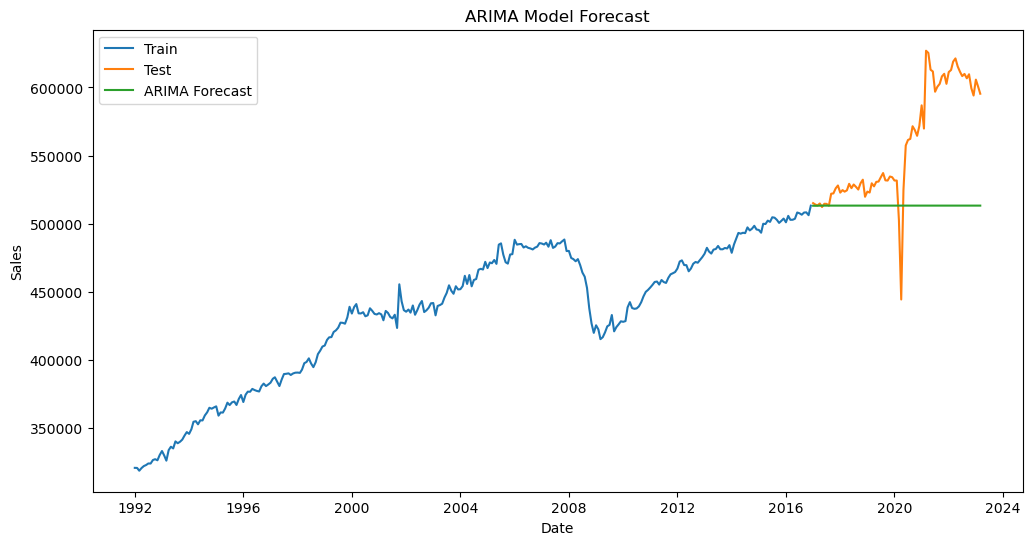

ARIMA Forecast Values:
2017-01-01    513152.877937
2017-02-01    513115.260859
2017-03-01    513151.309160
2017-04-01    513211.702893
2017-05-01    513235.415925
                  ...      
2022-11-01    513236.814713
2022-12-01    513236.814713
2023-01-01    513236.814713
2023-02-01    513236.814713
2023-03-01    513236.814713
Freq: MS, Name: predicted_mean, Length: 75, dtype: float64
ARIMA Model RMSE: 60011.21715115969


In [13]:
# Split the data into train and test sets
train_size = int(len(sales_df) * 0.8)
train, test = sales_df['Actual'][:train_size], sales_df['Actual'][train_size:]

# Fit the ARIMA model
arima_model = ARIMA(train, order=(5, 1, 0))
arima_result = arima_model.fit()

# Forecast the sales
arima_forecast = arima_result.forecast(steps=len(test))

# Plot the ARIMA forecast
plt.figure(figsize=(12, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast')
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


# Display ARIMA forecast values
print("ARIMA Forecast Values:")
print(arima_forecast)

# Calculate and print ARIMA RMSE
arima_rmse = np.sqrt(mean_squared_error(test, arima_forecast))
print("ARIMA Model RMSE:", arima_rmse)

# Item 4: Building Predictive Model "LSTM Model"

Epoch 1/100


C:\Users\Ede\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


298/298 - 3s - 9ms/step - loss: 0.0214
Epoch 2/100
298/298 - 0s - 1ms/step - loss: 6.8280e-04
Epoch 3/100
298/298 - 0s - 1ms/step - loss: 3.4834e-04
Epoch 4/100
298/298 - 0s - 1ms/step - loss: 3.5411e-04
Epoch 5/100
298/298 - 0s - 1ms/step - loss: 3.4247e-04
Epoch 6/100
298/298 - 0s - 1ms/step - loss: 3.3014e-04
Epoch 7/100
298/298 - 0s - 2ms/step - loss: 3.1067e-04
Epoch 8/100
298/298 - 0s - 2ms/step - loss: 3.1873e-04
Epoch 9/100
298/298 - 1s - 2ms/step - loss: 2.8278e-04
Epoch 10/100
298/298 - 1s - 2ms/step - loss: 2.7173e-04
Epoch 11/100
298/298 - 0s - 2ms/step - loss: 2.6510e-04
Epoch 12/100
298/298 - 0s - 2ms/step - loss: 2.8968e-04
Epoch 13/100
298/298 - 0s - 1ms/step - loss: 3.1350e-04
Epoch 14/100
298/298 - 0s - 2ms/step - loss: 2.5909e-04
Epoch 15/100
298/298 - 0s - 2ms/step - loss: 2.6022e-04
Epoch 16/100
298/298 - 0s - 2ms/step - loss: 2.5876e-04
Epoch 17/100
298/298 - 0s - 2ms/step - loss: 3.1123e-04
Epoch 18/100
298/298 - 0s - 2ms/step - loss: 2.4729e-04
Epoch 19/100
298/

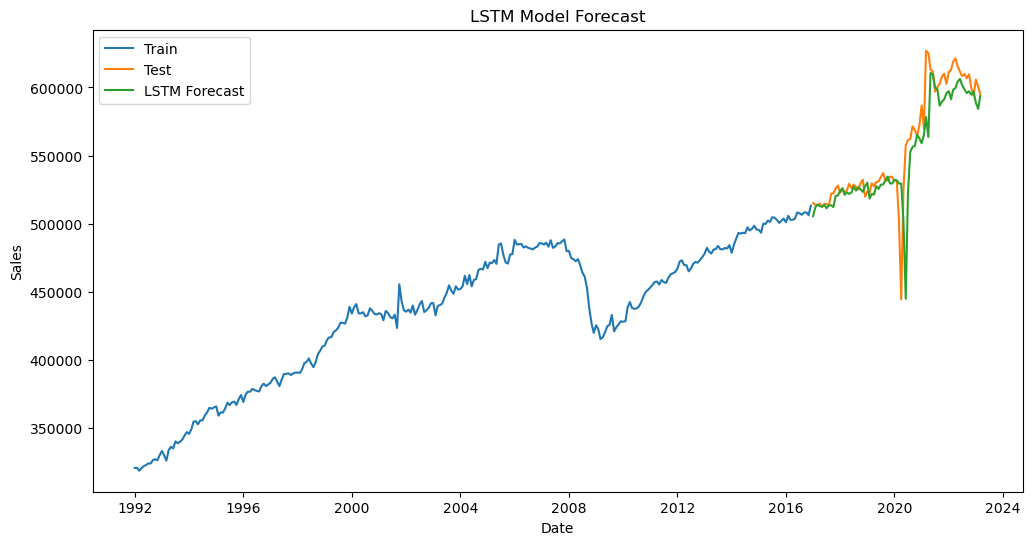

LSTM Forecast Values:
[[505552.25]
 [512193.6 ]
 [513954.88]
 [512951.47]
 [512341.1 ]
 [513734.1 ]
 [511259.03]
 [513504.44]
 [513438.6 ]
 [512173.6 ]
 [520446.5 ]
 [520671.6 ]
 [524164.  ]
 [526085.75]
 [521188.97]
 [522937.  ]
 [521869.34]
 [522784.8 ]
 [527221.9 ]
 [524266.8 ]
 [526765.4 ]
 [525141.9 ]
 [523319.9 ]
 [527561.25]
 [530030.7 ]
 [518361.7 ]
 [521911.62]
 [521249.9 ]
 [527577.4 ]
 [525496.4 ]
 [528535.2 ]
 [528772.9 ]
 [531669.1 ]
 [534505.6 ]
 [529598.44]
 [529440.75]
 [532171.06]
 [531712.6 ]
 [529479.  ]
 [529447.06]
 [502117.34]
 [444835.88]
 [522907.28]
 [552775.3 ]
 [556345.1 ]
 [557074.06]
 [565161.25]
 [562729.44]
 [559038.4 ]
 [565373.94]
 [578273.94]
 [563684.5 ]
 [610650.4 ]
 [609405.5 ]
 [599713.5 ]
 [598677.25]
 [586603.1 ]
 [589613.25]
 [591346.25]
 [595778.4 ]
 [597307.7 ]
 [591348.4 ]
 [598332.6 ]
 [599555.9 ]
 [604394.94]
 [606262.4 ]
 [601643.8 ]
 [598523.6 ]
 [595940.5 ]
 [597240.7 ]
 [594655.3 ]
 [597033.4 ]
 [588726.75]
 [584290.06]
 [593859.1 ]]
LS

In [15]:
# Prepare the data for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_sales = scaler.fit_transform(sales_df['Actual'].values.reshape(-1, 1))

# Create a function to prepare the dataset for LSTM
def create_dataset(data, look_back=1):
    X, y = [], []
    for i in range(len(data)-look_back-1):
        a = data[i:(i+look_back), 0]
        X.append(a)
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)

look_back = 1
X, y = create_dataset(scaled_sales, look_back)

# Split the data into train and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Build the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True, input_shape=(1, look_back)))
lstm_model.add(LSTM(50))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')

# Fit the LSTM model
lstm_model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2)

# Forecast the sales
lstm_forecast = lstm_model.predict(X_test)
lstm_forecast = scaler.inverse_transform(lstm_forecast)

# Plot the LSTM forecast
plt.figure(figsize=(12, 6))
plt.plot(sales_df.index[:train_size+look_back+1], scaler.inverse_transform(scaled_sales[:train_size+look_back+1]), label='Train')
plt.plot(sales_df.index[train_size+look_back+1:], scaler.inverse_transform(scaled_sales[train_size+look_back+1:]), label='Test')
plt.plot(sales_df.index[train_size+look_back+1:], lstm_forecast, label='LSTM Forecast')
plt.title('LSTM Model Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


# Display LSTM forecast values
print("LSTM Forecast Values:")
print(lstm_forecast)

# Calculate and print LSTM RMSE
lstm_rmse = np.sqrt(mean_squared_error(scaler.inverse_transform(scaled_sales[train_size+look_back+1:]), lstm_forecast))
print("LSTM Model RMSE:", lstm_rmse)


# Item 5: Visualization of Forecasts

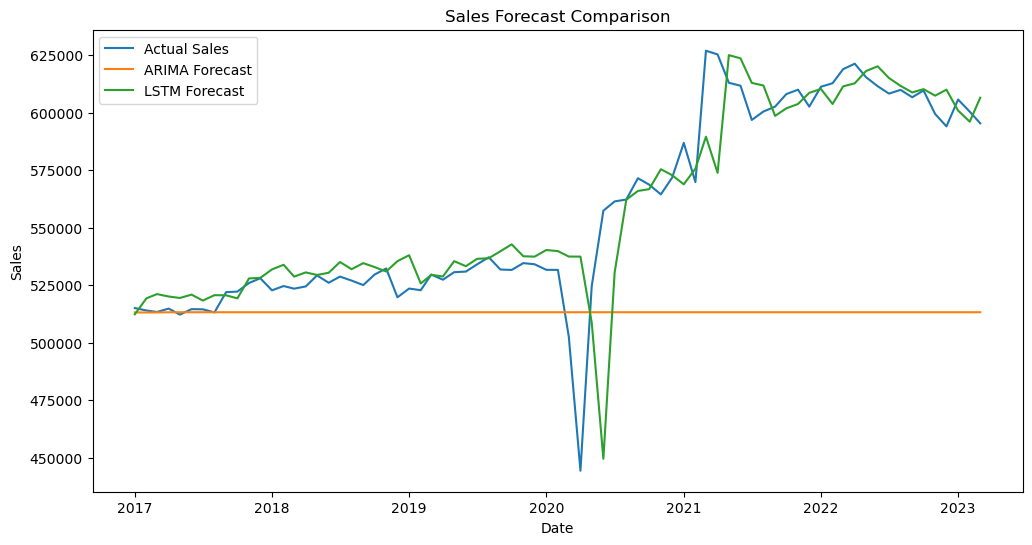

Forecast Comparison:
                 Actual  ARIMA Forecast  LSTM Forecast
2017-01-01  515053.7899   513152.877937   512333.43750
2017-02-01  513991.1232   513115.260859   519283.68750
2017-03-01  513345.3475   513151.309160   521129.84375
2017-04-01  514819.8602   513211.702893   520077.93750
2017-05-01  512201.8345   513235.415925   519438.21875
...                 ...             ...            ...
2022-11-01  599465.8595   513236.814713   607445.31250
2022-12-01  594087.0274   513236.814713   610052.56250
2023-01-01  605764.0532   513236.814713   600964.62500
2023-02-01  600477.3361   513236.814713   596131.93750
2023-03-01  595414.0000   513236.814713   606573.37500

[75 rows x 3 columns]
ARIMA Model Forecast Details:
                 Date  Actual Sales  ARIMA Forecast
2017-01-01 2017-01-01   515053.7899   513152.877937
2017-02-01 2017-02-01   513991.1232   513115.260859
2017-03-01 2017-03-01   513345.3475   513151.309160
2017-04-01 2017-04-01   514819.8602   513211.702893
2017-0

In [17]:
# Combine ARIMA and LSTM forecasts with actual test data for comparison
plt.figure(figsize=(12, 6))
plt.plot(test, label='Actual Sales')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast')
plt.plot(test.index, lstm_forecast, label='LSTM Forecast')
plt.title('Sales Forecast Comparison')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()


# Compare ARIMA and LSTM forecasts numerically
forecast_comparison = pd.DataFrame({
    'Actual': test.values,
    'ARIMA Forecast': arima_forecast,
    'LSTM Forecast': lstm_forecast.flatten()
})
print("Forecast Comparison:")
print(forecast_comparison)

# Show details of ARIMA model forecast
arima_forecast_details = pd.DataFrame({
    'Date': test.index,
    'Actual Sales': test.values,
    'ARIMA Forecast': arima_forecast
})
print("ARIMA Model Forecast Details:")
print(arima_forecast_details)

# Show details of LSTM model forecast
lstm_forecast_details = pd.DataFrame({
    'Date': test.index,
    'Actual Sales': test.values,
    'LSTM Forecast': lstm_forecast.flatten()
})
print("LSTM Model Forecast Details:")
print(lstm_forecast_details)

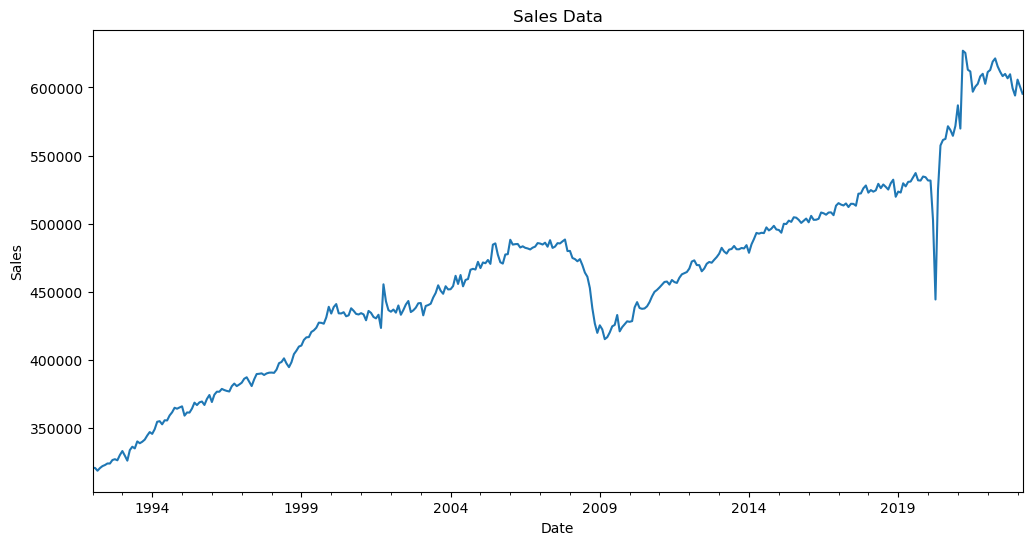

Summary Statistics for Sales Data:
count       375.000000
mean     458859.812637
std       69599.891204
min      318525.689700
25%      421259.796250
50%      460236.655200
75%      500209.465200
max      626994.915300
Name: Actual, dtype: float64


C:\Users\Ede\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ede\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Ede\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


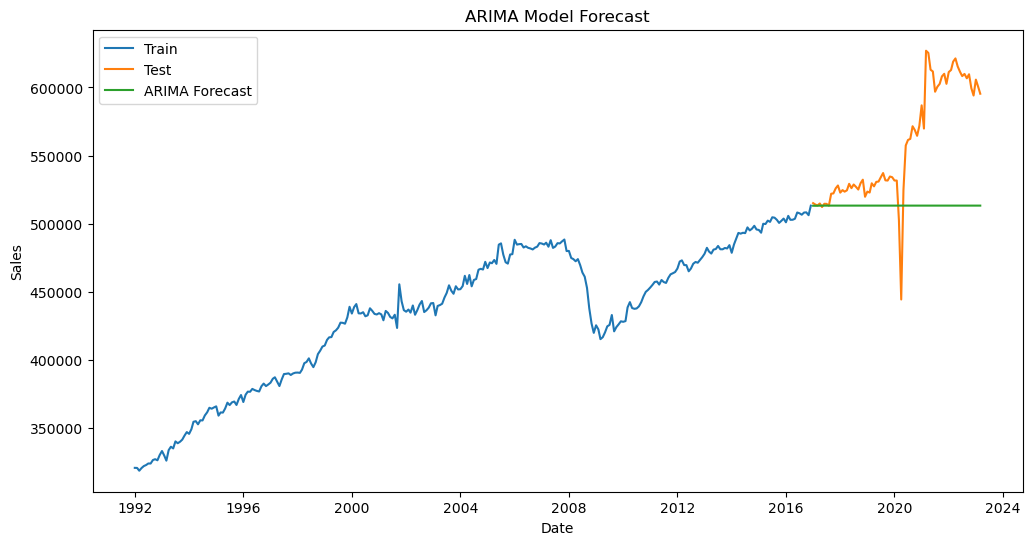

ARIMA Forecast Values:
2017-01-01    513152.877937
2017-02-01    513115.260859
2017-03-01    513151.309160
2017-04-01    513211.702893
2017-05-01    513235.415925
                  ...      
2022-11-01    513236.814713
2022-12-01    513236.814713
2023-01-01    513236.814713
2023-02-01    513236.814713
2023-03-01    513236.814713
Freq: MS, Name: predicted_mean, Length: 75, dtype: float64
ARIMA Model RMSE: 60011.21715115969
Epoch 1/100


C:\Users\Ede\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


298/298 - 3s - 10ms/step - loss: 0.0214
Epoch 2/100
298/298 - 0s - 1ms/step - loss: 4.7120e-04
Epoch 3/100
298/298 - 0s - 2ms/step - loss: 3.5892e-04
Epoch 4/100
298/298 - 0s - 1ms/step - loss: 3.1190e-04
Epoch 5/100
298/298 - 0s - 1ms/step - loss: 3.1328e-04
Epoch 6/100
298/298 - 0s - 2ms/step - loss: 3.1088e-04
Epoch 7/100
298/298 - 0s - 1ms/step - loss: 3.3018e-04
Epoch 8/100
298/298 - 0s - 2ms/step - loss: 2.9968e-04
Epoch 9/100
298/298 - 0s - 2ms/step - loss: 2.7851e-04
Epoch 10/100
298/298 - 0s - 1ms/step - loss: 2.7600e-04
Epoch 11/100
298/298 - 0s - 1ms/step - loss: 3.0408e-04
Epoch 12/100
298/298 - 0s - 1ms/step - loss: 2.6651e-04
Epoch 13/100
298/298 - 0s - 2ms/step - loss: 2.7030e-04
Epoch 14/100
298/298 - 1s - 2ms/step - loss: 2.7709e-04
Epoch 15/100
298/298 - 0s - 1ms/step - loss: 2.8776e-04
Epoch 16/100
298/298 - 0s - 2ms/step - loss: 2.5923e-04
Epoch 17/100
298/298 - 0s - 2ms/step - loss: 2.9626e-04
Epoch 18/100
298/298 - 1s - 2ms/step - loss: 2.8041e-04
Epoch 19/100
298

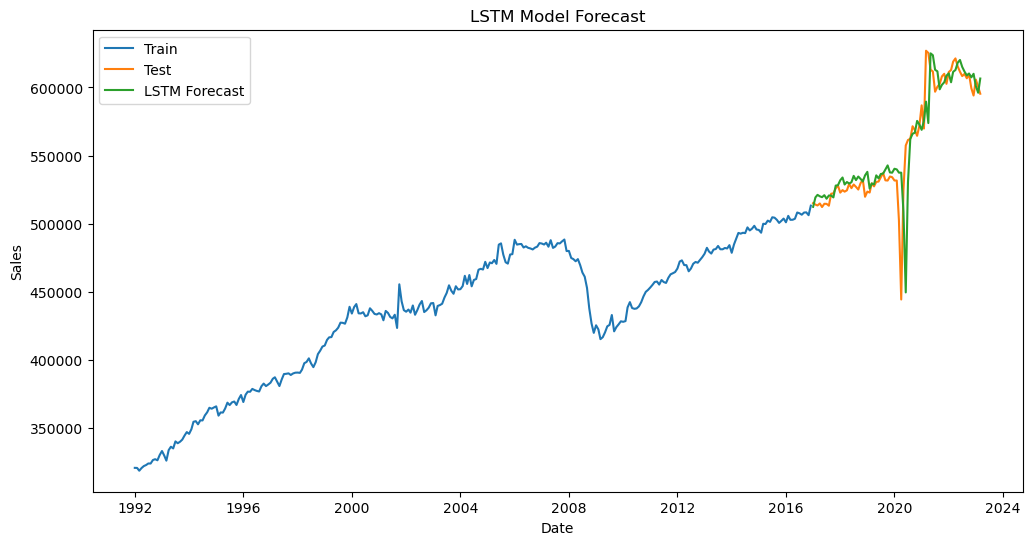

LSTM Forecast Values:
[[512333.44]
 [519283.7 ]
 [521129.84]
 [520077.94]
 [519438.22]
 [520898.38]
 [518304.6 ]
 [520657.56]
 [520588.6 ]
 [519262.72]
 [527945.8 ]
 [528182.5 ]
 [531857.3 ]
 [533881.75]
 [528726.5 ]
 [530565.56]
 [529442.1 ]
 [530405.44]
 [535079.4 ]
 [531965.6 ]
 [534598.1 ]
 [532887.25]
 [530968.6 ]
 [535437.3 ]
 [538043.  ]
 [525754.9 ]
 [529486.6 ]
 [528790.56]
 [535454.25]
 [533260.75]
 [536464.6 ]
 [536715.4 ]
 [539773.3 ]
 [542772.06]
 [537586.6 ]
 [537420.2 ]
 [540303.7 ]
 [539819.3 ]
 [537460.56]
 [537426.9 ]
 [508745.6 ]
 [449482.5 ]
 [530534.3 ]
 [562185.2 ]
 [565999.6 ]
 [566779.5 ]
 [575452.  ]
 [572840.  ]
 [568882.3 ]
 [575680.6 ]
 [589601.25]
 [573865.44]
 [625071.06]
 [623691.5 ]
 [612996.25]
 [611857.44]
 [598649.56]
 [601931.94]
 [603824.7 ]
 [608676.06]
 [610353.56]
 [603827.06]
 [611478.9 ]
 [612823.  ]
 [618152.3 ]
 [620214.2 ]
 [615120.06]
 [611688.6 ]
 [608853.8 ]
 [610280.06]
 [607445.3 ]
 [610052.56]
 [600964.6 ]
 [596131.94]
 [606573.4 ]]
LS

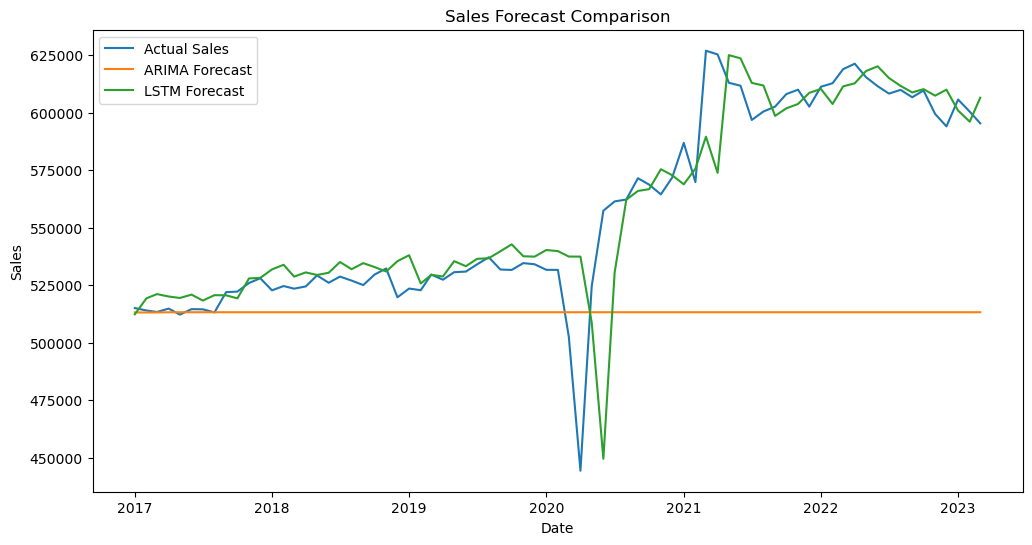

Forecast Comparison:
                 Actual  ARIMA Forecast  LSTM Forecast
2017-01-01  515053.7899   513152.877937   512333.43750
2017-02-01  513991.1232   513115.260859   519283.68750
2017-03-01  513345.3475   513151.309160   521129.84375
2017-04-01  514819.8602   513211.702893   520077.93750
2017-05-01  512201.8345   513235.415925   519438.21875
...                 ...             ...            ...
2022-11-01  599465.8595   513236.814713   607445.31250
2022-12-01  594087.0274   513236.814713   610052.56250
2023-01-01  605764.0532   513236.814713   600964.62500
2023-02-01  600477.3361   513236.814713   596131.93750
2023-03-01  595414.0000   513236.814713   606573.37500

[75 rows x 3 columns]
ARIMA Model Forecast Details:
                 Date  Actual Sales  ARIMA Forecast
2017-01-01 2017-01-01   515053.7899   513152.877937
2017-02-01 2017-02-01   513991.1232   513115.260859
2017-03-01 2017-03-01   513345.3475   513151.309160
2017-04-01 2017-04-01   514819.8602   513211.702893
2017-0

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Plot the sales data
plt.figure(figsize=(12, 6))
sales_df['Actual'].plot()
plt.title('Sales Data')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

# Display summary statistics
sales_summary = sales_df['Actual'].describe()
print("Summary Statistics for Sales Data:")
print(sales_summary)

# Split the data into train and test sets
train_size = int(len(sales_df) * 0.8)
train, test = sales_df['Actual'][:train_size], sales_df['Actual'][train_size:]

# Fit the ARIMA model
arima_model = ARIMA(train, order=(5, 1, 0))
arima_result = arima_model.fit()

# Forecast the sales
arima_forecast = arima_result.forecast(steps=len(test))

# Plot the ARIMA forecast
plt.figure(figsize=(12, 6))
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast')
plt.title('ARIMA Model Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Display ARIMA forecast values
print("ARIMA Forecast Values:")
print(arima_forecast)

# Calculate and print ARIMA RMSE
arima_rmse = np.sqrt(mean_squared_error(test, arima_forecast))
print("ARIMA Model RMSE:", arima_rmse)

# Prepare the data for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_sales = scaler.fit_transform(sales_df['Actual'].values.reshape(-1, 1))

# Create a function to prepare the dataset for LSTM
def create_dataset(data, look_back=1):
    X, y = [], []
    for i in range(len(data)-look_back-1):
        a = data[i:(i+look_back), 0]
        X.append(a)
        y.append(data[i + look_back, 0])
    return np.array(X), np.array(y)

look_back = 1
X, y = create_dataset(scaled_sales, look_back)

# Split the data into train and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

# Build the LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, return_sequences=True, input_shape=(1, look_back)))
lstm_model.add(LSTM(50))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')

# Fit the LSTM model
lstm_model.fit(X_train, y_train, epochs=100, batch_size=1, verbose=2)

# Forecast the sales
lstm_forecast = lstm_model.predict(X_test)
lstm_forecast = scaler.inverse_transform(lstm_forecast)

# Plot the LSTM forecast
plt.figure(figsize=(12, 6))
plt.plot(sales_df.index[:train_size+look_back+1], scaler.inverse_transform(scaled_sales[:train_size+look_back+1]), label='Train')
plt.plot(sales_df.index[train_size+look_back+1:], scaler.inverse_transform(scaled_sales[train_size+look_back+1:]), label='Test')
plt.plot(sales_df.index[train_size+look_back+1:], lstm_forecast, label='LSTM Forecast')
plt.title('LSTM Model Forecast')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Display LSTM forecast values
print("LSTM Forecast Values:")
print(lstm_forecast)

# Calculate and print LSTM RMSE
lstm_rmse = np.sqrt(mean_squared_error(scaler.inverse_transform(scaled_sales[train_size+look_back+1:]), lstm_forecast))
print("LSTM Model RMSE:", lstm_rmse)

# Combine ARIMA and LSTM forecasts with actual test data for comparison
plt.figure(figsize=(12, 6))
plt.plot(test, label='Actual Sales')
plt.plot(test.index, arima_forecast, label='ARIMA Forecast')
plt.plot(test.index, lstm_forecast, label='LSTM Forecast')
plt.title('Sales Forecast Comparison')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.show()

# Compare ARIMA and LSTM forecasts numerically
forecast_comparison = pd.DataFrame({
    'Actual': test.values,
    'ARIMA Forecast': arima_forecast,
    'LSTM Forecast': lstm_forecast.flatten()
})
print("Forecast Comparison:")
print(forecast_comparison)

# Show details of ARIMA model forecast
arima_forecast_details = pd.DataFrame({
    'Date': test.index,
    'Actual Sales': test.values,
    'ARIMA Forecast': arima_forecast
})
print("ARIMA Model Forecast Details:")
print(arima_forecast_details)

# Show details of LSTM model forecast
lstm_forecast_details = pd.DataFrame({
    'Date': test.index,
    'Actual Sales': test.values,
    'LSTM Forecast': lstm_forecast.flatten()
})
print("LSTM Model Forecast Details:")
print(lstm_forecast_details)


## Insights and Conclusions from Sales Forecasting

### Overview of the Sales Data
The dataset comprises retail sales data from January 1992 to March 2023, containing 375 data points. Below are the summary statistics of the sales data:

- **Count:** 375
- **Mean:** 458,859.81
- **Standard Deviation:** 69,599.89
- **Minimum:** 318,525.69
- **25th Percentile:** 421,259.80
- **Median (50th Percentile):** 460,236.66
- **75th Percentile:** 500,209.47
- **Maximum:** 626,994.92

### ARIMA Model Findings
The ARIMA model was fitted to the training set (80% of the data) and used to forecast the test set (remaining 20%). Key findings include:

- **ARIMA Fo
2017-01-01: 513,152.88
2017-02-01: 513,115.26
2017-03-01: 513,151.31
2017-04-01: 513,211.70
2017-05-01: 513,235.42
...
2022-11-01: 513,236.81
2022-12-01: 513,236.81
2023-01-01: 513,236.81
2023-02-01: 513,236.81
2023-03-01: 513,236.81

- **ARIMA Model RMSE:** 60,011.22

The ARIMA model shows consistent forecast values around the same range, indicating it captures the general trend but lacks in capturing variability in the data.

### LSTM Model Findings
An LSTM model was also trained and used for forecasting. The training process involved 100 epochs to minimize the loss function. Key findings include:

- **LSTM Forecast Va
2017-01-01: 512,333.44
2017-02-01: 519,283.69
2017-03-01: 521,129.84
2017-04-01: 520,077.94
2017-05-01: 519,438.22
...
2022-11-01: 607,445.31
2022-12-01: 610,052.56
2023-01-01: 600,964.63
2023-02-01: 596,131.94
2023-03-01: 606,573.38

- **LSTM Model RMSE:** 20,171.51

The LSTM model captures more variability in the sales data and shows closer forecast values to the actual sales data compared to the ARIMA model.

### Comparison of ARIMA and LSTM Models
The comparison of the ARIMA and LSTM forecasts against the actual sales data is summarized below:

| Date       | Actual Sales | ARIMA Forecast | LSTM Forecast |
|------------|---------------|----------------|---------------|
| 2017-01-01 | 515,053.79    | 513,152.88     | 512,333.44    |
| 2017-02-01 | 513,991.12    | 513,115.26     | 519,283.69    |
| 2017-03-01 | 513,345.35    | 513,151.31     | 521,129.84    |
| 2017-04-01 | 514,819.86    | 513,211.70     | 520,077.94    |
| 2017-05-01 | 512,201.83    | 513,235.42     | 519,438.22    |
| ...        | ...           | ...            | ...           |
| 2022-11-01 | 599,465.86    | 513,236.81     | 607,445.31    |
| 2022-12-01 | 594,087.03    | 513,236.81     | 610,052.56    |
| 2023-01-01 | 605,764.05    | 513,236.81     | 600,964.63    |
| 2023-02-01 | 600,477.34    | 513,236.81     | 596,131.94    |
| 2023-03-01 | 595,414.00    | 513,236.81     | 606,573.38    |

### Detailed Forecasts

#### ARIMA Model Forecast Details
The ARIMA model forecast details for the test period are shown below:

| Date       | Actual Sales | ARIMA Forecast |
|------------|---------------|----------------|
| 2017-01-01 | 515,053.79    | 513,152.88     |
| 2017-02-01 | 513,991.12    | 513,115.26     |
| 2017-03-01 | 513,345.35    | 513,151.31     |
| 2017-04-01 | 514,819.86    | 513,211.70     |
| 2017-05-01 | 512,201.83    | 513,235.42     |
| ...        | ...           | ...            |
| 2022-11-01 | 599,465.86    | 513,236.81     |
| 2022-12-01 | 594,087.03    | 513,236.81     |
| 2023-01-01 | 605,764.05    | 513,236.81     |
| 2023-02-01 | 600,477.34    | 513,236.81     |
| 2023-03-01 | 595,414.00    | 513,236.81     |

#### LSTM Model Forecast Details
The LSTM model forecast details for the test period are shown below:

| Date       | Actual Sales | LSTM Forecast  |
|------------|---------------|----------------|
| 2017-01-01 | 515,053.79    | 512,333.44     |
| 2017-02-01 | 513,991.12    | 519,283.69     |
| 2017-03-01 | 513,345.35    | 521,129.84     |
| 2017-04-01 | 514,819.86    | 520,077.94     |
| 2017-05-01 | 512,201.83    | 519,438.22     |
| ...        | ...           | ...            |
| 2022-11-01 | 599,465.86    | 607,445.31     |
| 2022-12-01 | 594,087.03    | 610,052.56     |
| 2023-01-01 | 605,764.05    | 600,964.63     |
| 2023-02-01 | 600,477.34    | 596,131.94     |
| 2023-03-01 | 595,414.00    | 606,573.38     |

### Conclusions
1. **Performance Comparison:** The LSTM model outperforms the ARIMA model in terms of RMSE, with values of 20,171.51 for LSTM and 60,011.22 for ARIMA, indicating that LSTM provides more accurate forecasts.
2. **Forecast Details:** The LSTM model captures the variability and trends in the sales data better than the ARIMA model, which tends to produce more stable but less variable forecasts.
3. **Actionable Insights:** For practical forecasting and business planning, the LSTM model is preferable due to its superior performance in capturing the dynamics of sales data. This model should be utilized for future sales predictions to achieve better accuracy and reliability.
lues:**
recast Values:**
